In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd 
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
import joblib

df = pd.read_csv("/Users/khali/Desktop/Coding Workspace/Flight Delay Prediction/data/processed/Airline_Delay_Cause_Clean.csv")

df["high_delay"] = (df["delay_rate"] > 0.2 ).astype(int)

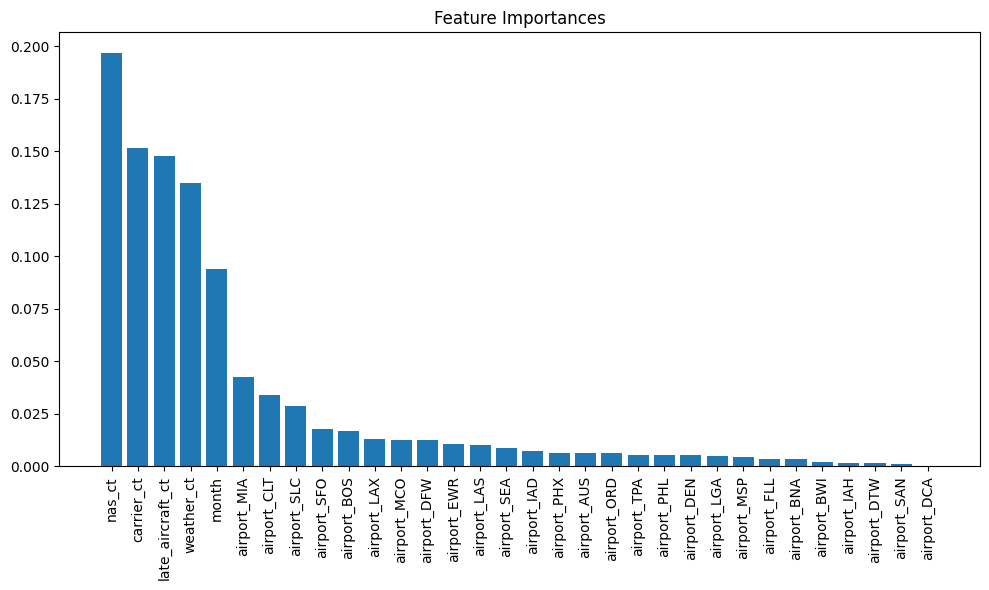

             Feature  Importance
3             nas_ct    0.196793
1         carrier_ct    0.151424
4   late_aircraft_ct    0.147651
2         weather_ct    0.134839
0              month    0.093953
22       airport_MIA    0.042576
9        airport_CLT    0.034114
30       airport_SLC    0.028761
29       airport_SFO    0.017995
7        airport_BOS    0.016943
19       airport_LAX    0.013057
21       airport_MCO    0.012761
12       airport_DFW    0.012653
14       airport_EWR    0.010428
18       airport_LAS    0.010247
28       airport_SEA    0.008953
16       airport_IAD    0.007455
26       airport_PHX    0.006544
5        airport_AUS    0.006451
24       airport_ORD    0.006270
31       airport_TPA    0.005549
25       airport_PHL    0.005493
11       airport_DEN    0.005472
20       airport_LGA    0.005044
23       airport_MSP    0.004574
15       airport_FLL    0.003544
6        airport_BNA    0.003538
8        airport_BWI    0.002303
17       airport_IAH    0.001849
13       a

In [7]:
x = df[["month" , "carrier" , "airport" , "carrier_ct" , "weather_ct" , "nas_ct" , "late_aircraft_ct"]]
y = df["high_delay"]


x = pd.get_dummies(x , columns=["carrier" , "airport" ] , drop_first=True)


feature_columns = x.columns.tolist()
joblib.dump(feature_columns , "/Users/khali/Desktop/Coding Workspace/Flight Delay Prediction/model/feature_columns.pkl" )

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42) 
#we training 80% of the data, we're just prepping it here for now

df_balanced = pd.concat([x,y] , axis = 1)
df_majority = df_balanced[df_balanced["high_delay"] == 0]
df_minority = df_balanced[df_balanced["high_delay"] == 1]

df_minority_upsampled = resample(df_minority , 
                                 replace = True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_upsampled = pd.concat([df_majority , df_minority_upsampled])
x = df_upsampled.drop("high_delay" , axis = 1)
y = df_upsampled["high_delay"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42) 


model = RandomForestClassifier(n_estimators=100, random_state=42 )
model.fit(x_train,y_train)
#^ above code actually trains it now 

joblib.dump(model , "/Users/khali/Desktop/Coding Workspace/Flight Delay Prediction/model/model.pkl")


importances = model.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)) , importances[indices])
plt.xticks(range(len(importances)) , feature_names[indices] , rotation = 90)
plt.tight_layout()
plt.show()

importance_df = pd.DataFrame({
    "Feature" : feature_names, 
    "Importance" : importances 
}).sort_values(by = "Importance" , ascending = False)
print(importance_df)


y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred , zero_division=0))
#y_pred tests itself on x_test, and bases on how good it did versus y_test


